# Tree-based methods

In [5]:
library(ISLR)
library(caret)
library(tree)
data(Carseats)

In [6]:
Carseats$High <- as.factor(ifelse(Carseats$Sales <= 8, "No","Yes"))
summary(Carseats)

     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

## Decision Trees and Pruning

In [7]:
tree.carseats <- tree(High ~ .-Sales,Carseats)

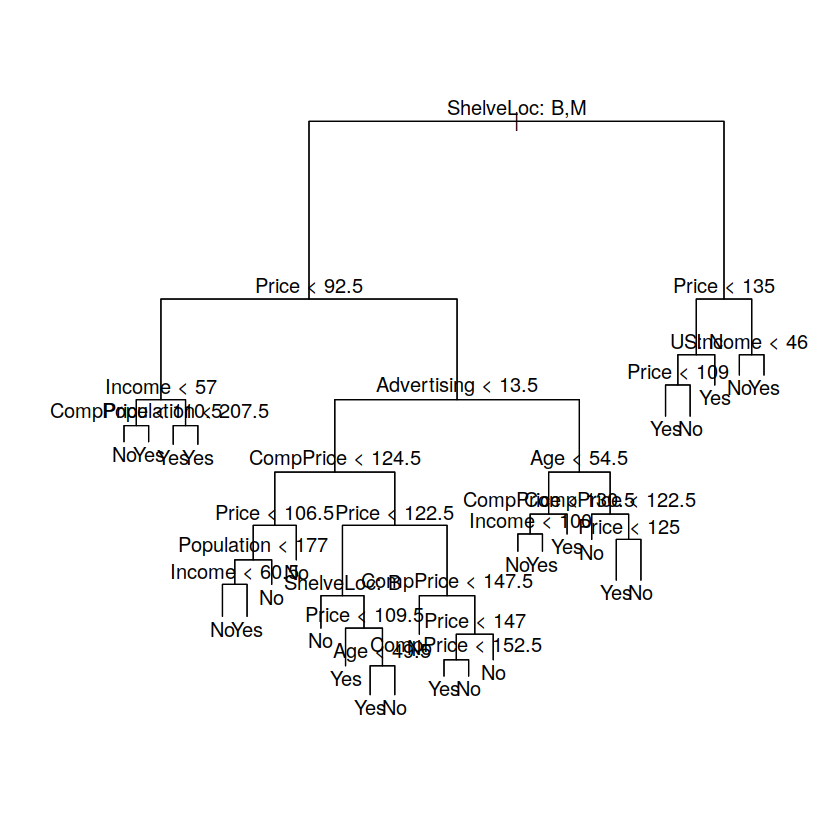

In [12]:
plot(tree.carseats)
text(tree.carseats,pretty=1)

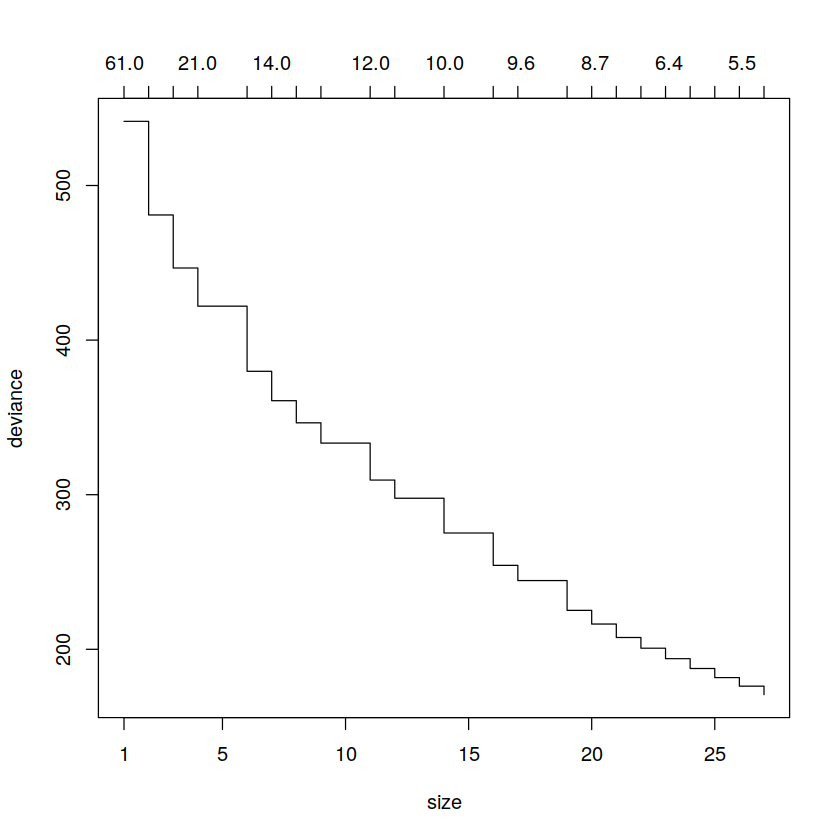

In [16]:
pruned.trees <- prune.tree(tree.carseats)
plot(pruned.trees)

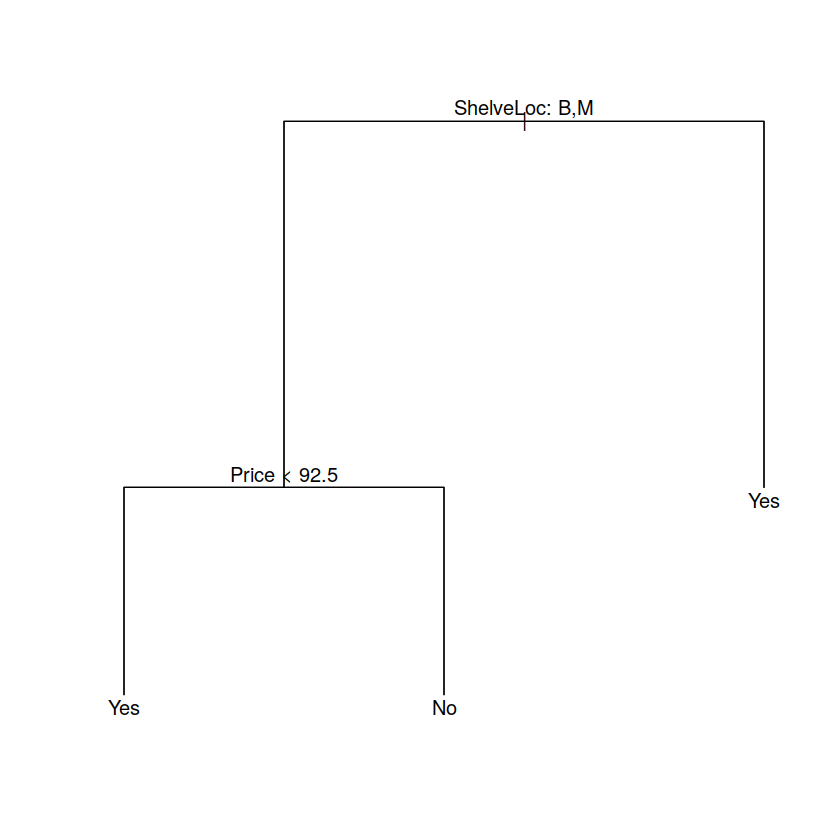

In [36]:
pruned.tree <- prune.tree(tree.carseats,k=24.69954)
plot(pruned.tree)
text(pruned.tree,pretty=1)

In [31]:
cv.tree.carseats <- cv.tree(tree.carseats)

[1] 24.69954


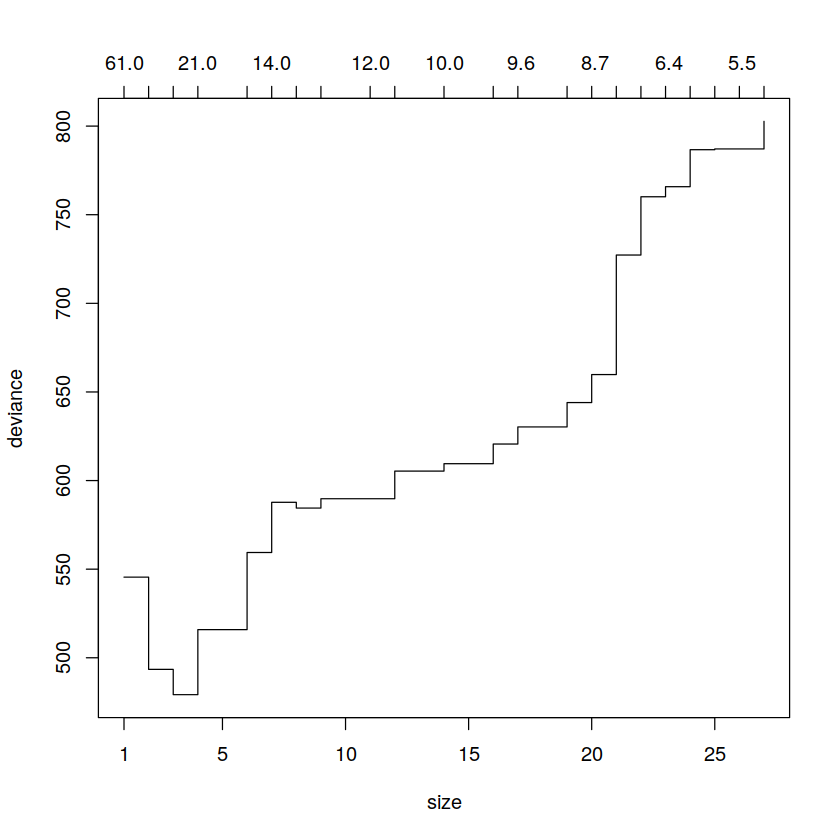

In [43]:
plot(cv.tree.carseats)
print(cv.tree.carseats$k[which.min(cv.tree.carseats$dev)])

## Bagging and Random Forests

Let's first do bagging. For this we can use the randomForests library. (Why?)

In [50]:
library(randomForest)
B <- 2500

In [51]:
Carseats2 <- Carseats
Carseats2$High <- NULL
bag.carseats <- randomForest(Sales ~ .,data=Carseats2,ntree=B,mtry=ncol(Carseats2)-1)

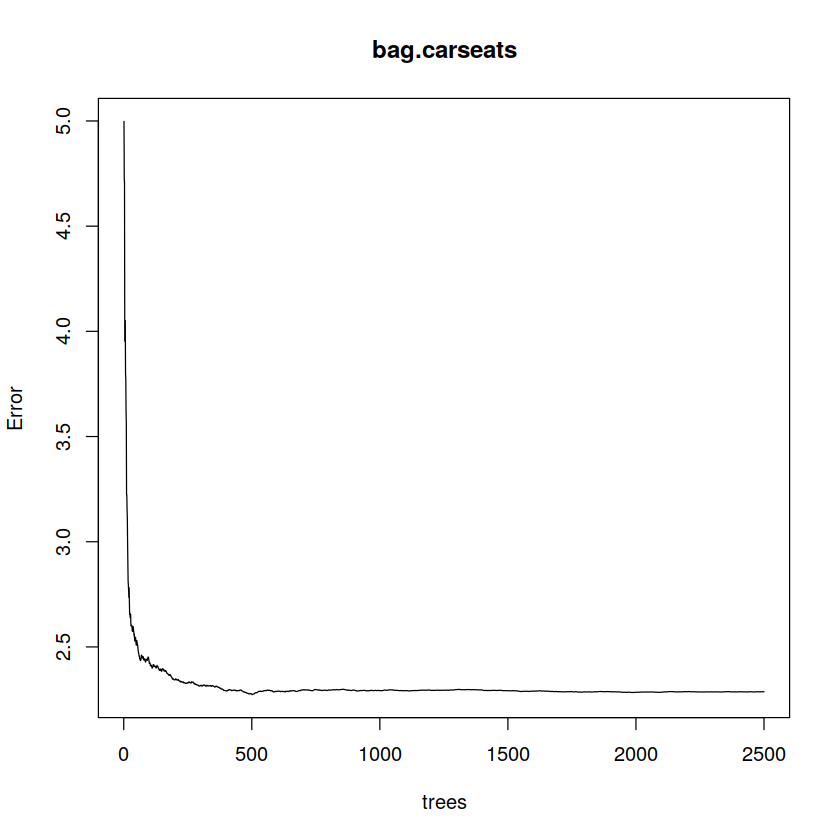

In [52]:
plot(bag.carseats)

In [53]:
rf.carseats <- randomForest(Sales ~ ., data=Carseats2, ntree=B)

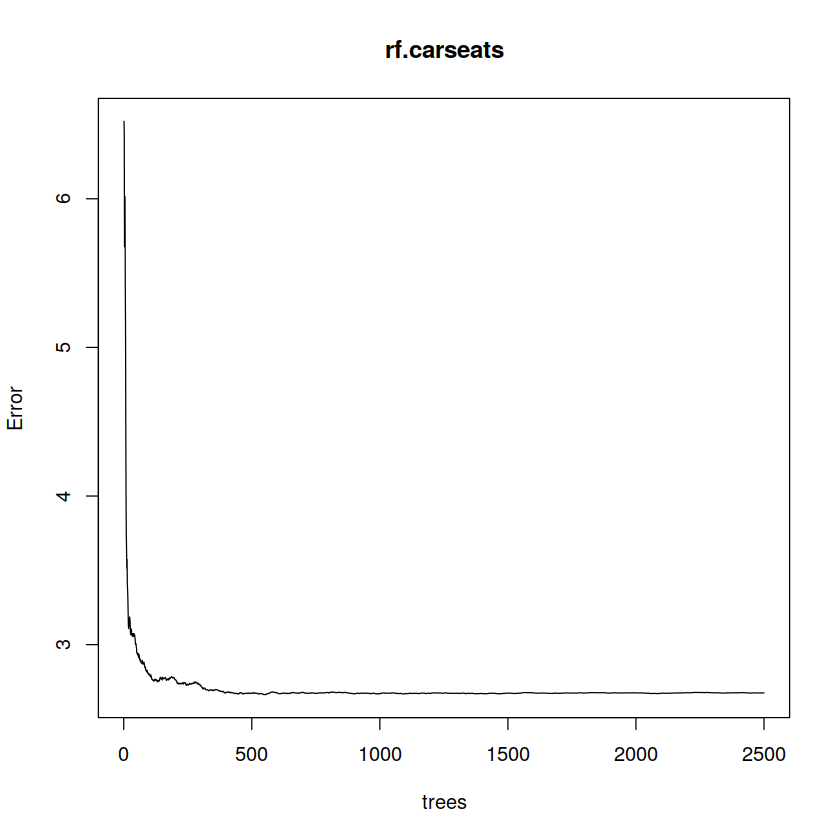

In [54]:
plot(rf.carseats)

In [57]:
bag.carseats$mse[2500]

[1] 2.286823

In [58]:
rf.carseats$mse[2500]

[1] 2.675753

## Boosting

In [74]:
library(gbm)

In [75]:
B.boost <- 5000
train <- createDataPartition(Carseats2$Sales,p=0.63,list=FALSE)
boost.carseats <- gbm(Sales ~ ., data=Carseats2[train,],distribution="gaussian",n.trees=B.boost,interaction.depth=3)

,var,rel.inf
Price,Price,31.2565368
ShelveLoc,ShelveLoc,29.7750750
Advertising,Advertising,12.3588764
CompPrice,CompPrice,11.9008283
Age,Age,8.8895643
Income,Income,3.6370506
Population,Population,1.3862216
Education,Education,0.4441514
Urban,Urban,0.1788299
US,US,0.1728658


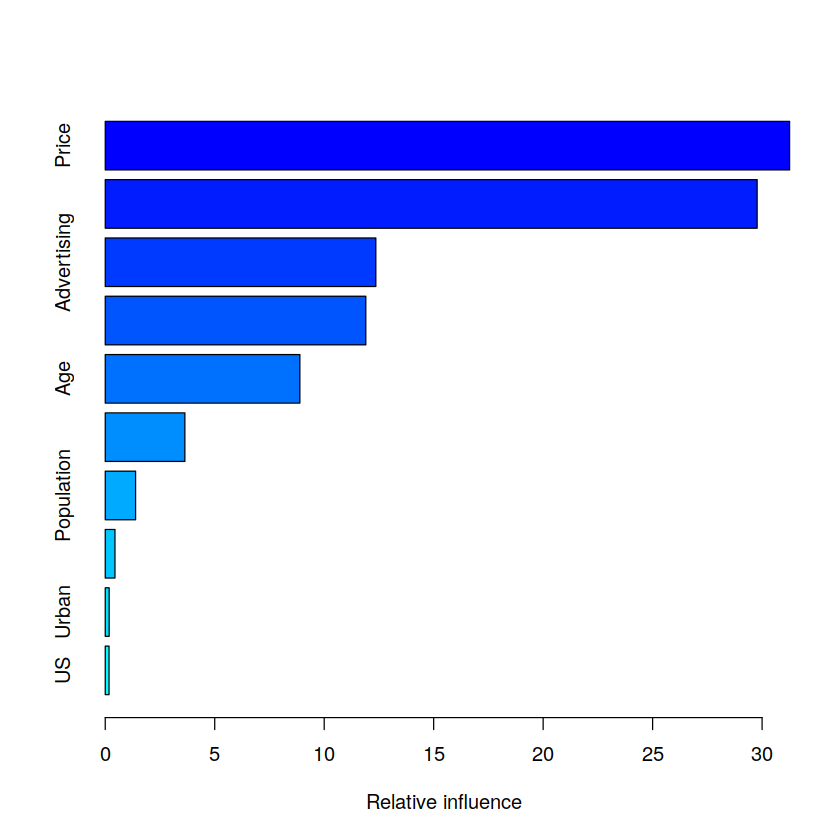

In [76]:
summary(boost.carseats)

In [77]:
pp <- predict(boost.carseats,newdata=Carseats2[-train,],n.trees=B.boost,type="response")
mean((pp-Carseats2$Sales[-train])^2)

[1] 2.097814